# EMAT31530 Introduction to Artificial Intelligence
## Worksheet 1 Linear Regression
In this worksheet you will spend more time using one of the most popular Python libraries for regression and classification, scikit-learn. 

We will learn how to use common features of the scikit-learn API in order to produce linear regression predictions on a small real world dataset.

If you are using this in Google Colab:

To run the code in the cells below, click the cell and then press the play button to the left of the code. To edit code, just click the cell and start writing.

Any variables that you define in one cell can later be used in other cells, so be careful.

In [3]:
from sklearn import datasets
boston = datasets.load_boston()

X = boston.data
y = boston.target


There are 14 features, and the documentation provides us with some more information about what they mean.


```
0: CRIM - per capita crime rate by town
1: ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2: INDUS - proportion of non-retail business acres per town.
3: CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4: NOX - nitric oxides concentration (parts per 10 million)
5: RM - average number of rooms per dwelling
6: AGE - proportion of owner-occupied units built prior to 1940
7: DIS - weighted distances to five Boston employment centres
8: RAD - index of accessibility to radial highways
9: TAX - full-value property-tax rate per $10,000
10: PTRATIO - pupil-teacher ratio by town
11: B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12: LSTAT - % lower status of the population
13: MEDV - Median value of owner-occupied homes in $1000's
```




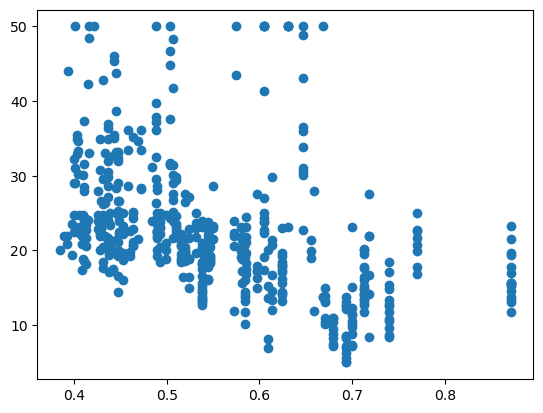

In [4]:
import matplotlib.pyplot as plt

nox = X[:,[4]]
plt.scatter(nox, y)

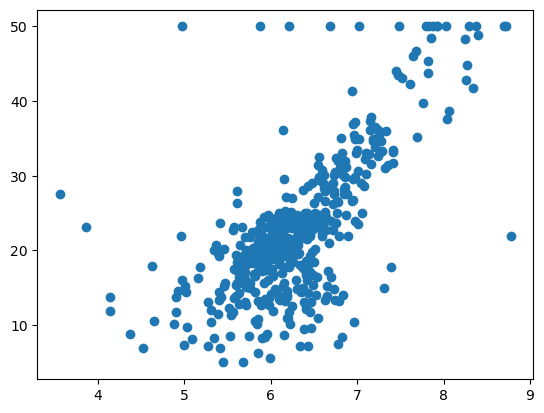

In [26]:
num_rooms = X[:,[5]]
plt.scatter(num_rooms, y)

The first 5 predicted house values are [array([23.09903687]), array([25.43924467]), array([25.43924467]), array([25.81232127]), array([25.81232127])]
The first 5 true house values are [24.  21.6 34.7 33.4 36.2]


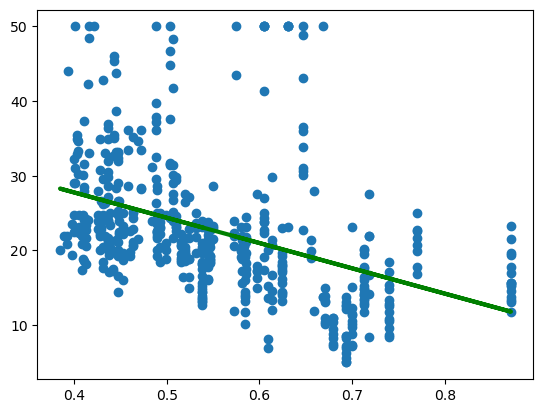

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = LinearRegression().fit(nox.reshape(-1,1), y)

predictions = [model.predict(a.reshape(-1,1)) for a in nox]
print("The first 5 predicted house values are %s" % predictions[:5])
print("The first 5 true house values are %s" % y[:5])

plt.scatter(nox, y)
plt.plot(nox, predictions, color='green', linewidth=3)

In [28]:
def produce_linear_plot(x, y, plot=False):
    # Load dependancies
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt
    
    # Singular feature
    if len(x.shape) == 1:
        # Create model
        model = LinearRegression().fit(x.reshape(-1,1), y)
    
        # Generate predictions
        predictions = [model.predict(value.reshape(-1,1)) for value in x]
        
    # Multiple features
    else:
        model = LinearRegression().fit(X, y)
        predictions = model.predict(X)

    # Plot values
    plt.scatter(x, y)
    plt.plot(x, predictions, color='green', linewidth=3)
    plt.show()

    return predictions

True
Plotting


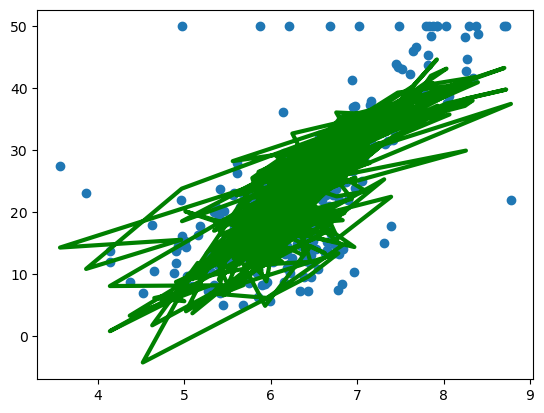

The first 5 predicted house values are [30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]
The first 5 true house values are [24.  21.6 34.7 33.4 36.2]


In [29]:
predictions = produce_linear_plot(num_rooms, y)
print("The first 5 predicted house values are %s" % predictions[:5])
print("The first 5 true house values are %s" % y[:5])

# Quantifying how good the model is: MSE


$MSE ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}$

where ${\hat {y_{i}}}$ is the prediction, and $y$ is the ground truth value, i.e., the true known value, and $n$ is the number of data points.


In [59]:
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_true, y_pred, sample_weight=None, 
# multioutput='uniform_average', squared=True)

**Task 6: Look at the documentation for the mean_squared_error function (https://scikit-learn.org/0.22/modules/generated/sklearn.metrics.mean_squared_error.html), and apply it below to calculate the mean squared error of your predictions.**



In [61]:
num_rooms_mse = mean_squared_error(y, num_rooms_predictions)
num_rooms_mse

43.60055177116956

**Task 7: Use the *produce_linear_plot* function above to produce the predictions for the nox feature. Do so, and report the MSE of it.**

In [68]:
nox_predictions = produce_linear_plot(nox, y)
nox_mse = mean_squared_error(y, nox_predictions)
nox_mse

69.00428835540669

The MSE for the number of rooms is lower, which is telling us that it is a better predictor of the house price than the nox value.

**Task 8: What is the perfomance if you use *all* of the features?**

In [140]:
predictions = produce_linear_plot(X, y)
performance = mean_squared_error(y, predictions)
print(performance)

21.894831181729202


Peak indicator for house price is: LSTAT


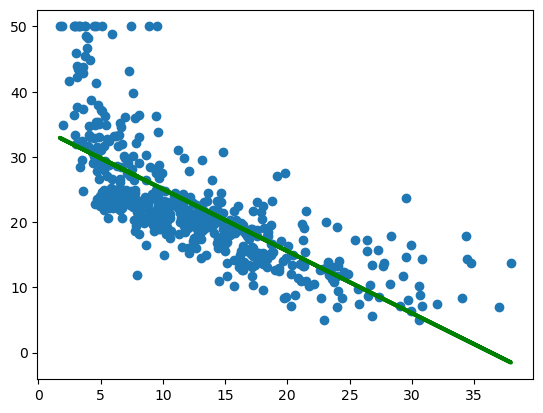

In [117]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
performance = {}
min_val = 100

for index, feature in enumerate(features):
    x = X[:,index]
    
    predictions = produce_linear_plot(x, y)
    mse = mean_squared_error(y, predictions)
    
    performance[feature] = mse
    
    if mse < min_val:
        min_val = mse
        min_label = feature
        min_x = x
        
print('Peak indicator for house price is: ' + min_label)
regr = produce_linear_plot(min_x, y, True)

#Next time
Next week we will extend what we have done so far to be more useful for real world machine learning taks. We will learn how we want to build a model on 'training data' such that it can accurately predict labels for 'test data'. Then we will also look beyond regression, and look at classification models where we want to predict a discrete label rather than a continuous label.